https://www.kaggle.com/c/competitive-data-science-final-project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
ls all

item_categories.csv*   sales_train.csv*       shops.csv*
items.csv*             sample_submission.csv* test.csv*


In [3]:
path = '/Users/rizki/Dropbox/Coursera/AML_HowToKaggle/FinalProject/PredictSales/all/'

In [4]:
items = pd.read_csv(path+'items.csv')
item_categories = pd.read_csv(path+'item_categories.csv')
shops = pd.read_csv(path+'shops.csv')
sales_train = pd.read_csv(path+'sales_train.csv')
test = pd.read_csv(path+'test.csv')

In [5]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


# Counting

In [6]:
print 'total rows in train set', sales_train.shape[0]
unique_items = items['item_id'].unique().size
print 'Number of unique item_id :', unique_items
unique_shops = shops['shop_id'].unique().size
print 'Number of unique shop_id :', unique_shops
total_possible_shop_id_item_id = unique_shops*unique_items
print 'total_possible_shop_id_item_id =',total_possible_shop_id_item_id
print 'shop_item combinations in test set:', test.shape[0]
print 'shop_item combinations in train set:', sales_train.groupby(['shop_id','item_id']).count().shape[0]

total rows in train set 2935849
Number of unique item_id : 22170
Number of unique shop_id : 60
total_possible_shop_id_item_id = 1330200
shop_item combinations in test set: 214200
shop_item combinations in train set: 424124


# Format 'date' to datetime

In [7]:
sales_train['date'] = pd.to_datetime(sales_train['date'],format='%d.%m.%Y')
sales_train[sales_train['date'].dt.month==1].head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


# Add item_category_id to sales_train

In [8]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [9]:
sales_train.sort_values(by='item_id').head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1972636,2014-09-01,20,54,0,58.0,1.0
1552550,2014-04-04,15,55,1,4490.0,1.0
1552605,2014-04-02,15,55,1,4490.0,1.0
1815470,2014-07-06,18,55,1,4490.0,1.0
2021246,2014-09-11,20,55,1,4490.0,1.0


In [10]:
sales_train = pd.merge(sales_train,items[['item_id','item_category_id']],on='item_id',how='left').sort_values(by='item_id')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
1972636,2014-09-01,20,54,0,58.0,1.0,40
1552550,2014-04-04,15,55,1,4490.0,1.0,76
1552605,2014-04-02,15,55,1,4490.0,1.0,76
1815470,2014-07-06,18,55,1,4490.0,1.0,76
2021246,2014-09-11,20,55,1,4490.0,1.0,76


# Check by total item_cnt by month per year

In [11]:
print 'years in train data: ',sales_train['date'].dt.year.unique()

years in train data:  [2014 2015 2013]


In [12]:
sales_train['year'] = sales_train['date'].dt.year.astype('string')
sales_train['month'] = sales_train['date'].dt.month.astype('string')
# sales_train['Y_M'] = sales_train['year']+'_'+sales_train['month']
# sales_train.drop(columns=['year','month'], inplace=True)

In [13]:
sales_train_year = sales_train['date'].dt.year.astype('string')
sales_train_month = sales_train['date'].dt.month.astype('string')
sales_train['Y_M'] = sales_train_year+'_'+sales_train_month

In [14]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,year,month,Y_M
1972636,2014-09-01,20,54,0,58.0,1.0,40,2014,9,2014_9
1552550,2014-04-04,15,55,1,4490.0,1.0,76,2014,4,2014_4
1552605,2014-04-02,15,55,1,4490.0,1.0,76,2014,4,2014_4
1815470,2014-07-06,18,55,1,4490.0,1.0,76,2014,7,2014_7
2021246,2014-09-11,20,55,1,4490.0,1.0,76,2014,9,2014_9


In [15]:
sales_train.groupby(['date_block_num','Y_M'])['item_cnt_day'].agg(['sum'])

,,sum
date_block_num,Y_M,
0,2013_1,131479.0
1,2013_2,128090.0
2,2013_3,147142.0
3,2013_4,107190.0
4,2013_5,106970.0
5,2013_6,125381.0
6,2013_7,116966.0
7,2013_8,125291.0
8,2013_9,133332.0


In [16]:
#split by year
sales_train_2013 = sales_train[sales_train['year']=='2013']
sales_train_2014 = sales_train[sales_train['year']=='2014']
sales_train_2015 = sales_train[sales_train['year']=='2015']

In [17]:
total_item_cnt_2013 = sales_train_2013.groupby(['date_block_num','Y_M'])['item_cnt_day'].sum().values
total_item_cnt_2014 = sales_train_2014.groupby(['date_block_num','Y_M'])['item_cnt_day'].sum().values
total_item_cnt_2015 = sales_train_2015.groupby(['date_block_num','Y_M'])['item_cnt_day'].sum().values

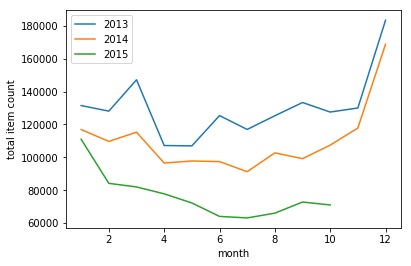

In [18]:
#absolute
total_item_cnt_2013 = (total_item_cnt_2013)
total_item_cnt_2014 = (total_item_cnt_2014)
total_item_cnt_2015 = (total_item_cnt_2015)

x13 = [i+1 for i in xrange(len(total_item_cnt_2013)) ]
y13 = total_item_cnt_2013
x14 = [i+1 for i in xrange(len(total_item_cnt_2014)) ]
y14 = total_item_cnt_2014
x15 = [i+1 for i in xrange(len(total_item_cnt_2015)) ]
y15 = total_item_cnt_2015
plt.plot(x13,y13,label='2013')
plt.plot(x14,y14,label='2014')
plt.plot(x15,y15,label='2015')
plt.ylabel('total item count')
plt.xlabel('month')
plt.legend()
plt.show()

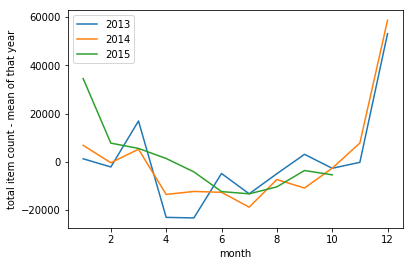

In [19]:
#translation by mean
total_item_cnt_2013_trans = (total_item_cnt_2013-total_item_cnt_2013.mean())
total_item_cnt_2014_trans = (total_item_cnt_2014-total_item_cnt_2014.mean())
total_item_cnt_2015_trans = (total_item_cnt_2015-total_item_cnt_2015.mean())

x13 = [i+1 for i in xrange(len(total_item_cnt_2013_trans)) ]
y13 = total_item_cnt_2013_trans
x14 = [i+1 for i in xrange(len(total_item_cnt_2014_trans)) ]
y14 = total_item_cnt_2014_trans
x15 = [i+1 for i in xrange(len(total_item_cnt_2015_trans)) ]
y15 = total_item_cnt_2015_trans
plt.plot(x13,y13,label='2013')
plt.plot(x14,y14,label='2014')
plt.plot(x15,y15,label='2015')
plt.ylabel('total item count - mean of that year')
plt.xlabel('month')
plt.legend()
plt.show()

In [20]:
#plot item_cnt vs month, per shop_id
shop_id_2013 = sales_train_2013.groupby(['shop_id'],as_index=False)['item_cnt_day'].sum()['shop_id'].values
shop_id_2014 = sales_train_2014.groupby(['shop_id'],as_index=False)['item_cnt_day'].sum()['shop_id'].values
shop_id_2015 = sales_train_2015.groupby(['shop_id'],as_index=False)['item_cnt_day'].sum()['shop_id'].values

# Missing shops 

In [21]:
missing_shop_id_2013 = set(shops['shop_id']) - set(shop_id_2013)
missing_shop_id_2014 = set(shops['shop_id']) - set(shop_id_2014)
missing_shop_id_2015 = set(shops['shop_id']) - set(shop_id_2015)

In [22]:
print 'missing_shop_id_2013:',list(missing_shop_id_2013)
print 'missing_shop_id_2014:',list(missing_shop_id_2014)
print 'missing_shop_id_2015:',list(missing_shop_id_2015)

missing_shop_id_2013: [33, 34, 36, 39, 40, 11, 48, 20]
missing_shop_id_2014: [0, 1, 36, 32, 8, 11, 23]
missing_shop_id_2015: [0, 1, 32, 8, 13, 23]


In [23]:
print 'shops in 2013 which closed in 2014:',list(set(shop_id_2013)-set(shop_id_2014))
print 'shops opened in 2014 not present in 2013:',list(set(shop_id_2014)-set(shop_id_2013))
print 'shops in 2014 which closed in 2015:',list(set(shop_id_2014)-set(shop_id_2015))
print 'shops opened in 2015 not present in 2014:',list(set(shop_id_2015)-set(shop_id_2014))

shops in 2013 which closed in 2014: [0, 1, 32, 8, 23]
shops opened in 2014 not present in 2013: [33, 34, 39, 40, 48, 20]
shops in 2014 which closed in 2015: [13]
shops opened in 2015 not present in 2014: [11, 36]


In [24]:
shop_in_train_not_in_test = set(sales_train['shop_id'].unique())-set(test['shop_id'].unique())
print 'shop_in_train_not_in_test:',list(shop_in_train_not_in_test)

shop_in_train_not_in_test: [0, 1, 43, 33, 32, 8, 9, 11, 13, 17, 51, 20, 54, 23, 40, 27, 29, 30]
